In [10]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt

In [2]:
X = torch.arange(0,200,1)

In [16]:
y = 0.3*X+0.9

In [8]:
train_index = int(0.8*len(X))
X_train, y_train = X[:train_index], y[:train_index]
X_test, y_test = X[train_index:],y[train_index:]

In [9]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

(torch.Size([160]), torch.Size([160]), torch.Size([40]), torch.Size([40]))

In [23]:
def plot_model(X_train = X_train,y_train = y_train, X_test= X_test, y_test = y_test,
               predictions=None):
    plt.scatter(X_train,y_train,c='b',s=4, label="Training Data")
    plt.scatter(X_test,y_test,c='g',s=4, label="Test Data")
    if predictions is not None:
        plt.scatter(X_test,predictions,c='r',s=4, label="Predictions")

    plt.legend()


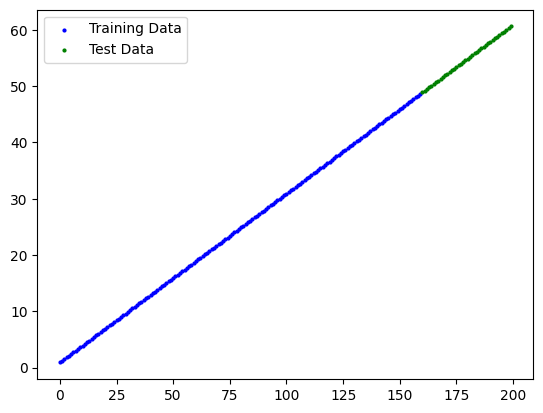

In [24]:
plot_model()

In [42]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad = True))
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad = True))
    def forward(self,X):
            return self.weight*X + self.bias

In [43]:
model_1 = LinearRegressionModel()

In [44]:
model_1.state_dict()

OrderedDict([('weight', tensor([1.0953])), ('bias', tensor([1.6635]))])

In [45]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_1.parameters(),lr =0.001)

In [46]:
epochs = 300

for epoch in range(epochs):
    #Forward pass
    model_1.train()
    y_pred = model_1(X_train)

    #calculate loss
    loss = loss_fn(y_pred,y_train)

    #Gradients zero
    optimizer.zero_grad()
    #loss backward pass
    loss.backward()
    #optimizer step
    optimizer.step()
    model_1.eval()
    with torch.inference_mode():
        y_test_pred = model_1(X_test)
        test_loss = loss_fn(y_test_pred,y_test)
    if epoch%20==0:
        print(f"Epoch: {epoch} | Train loss : {loss} | Test loss : {test_loss}")

Epoch: 0 | Train loss : 63.9874382019043 | Test loss : 129.24314880371094
Epoch: 20 | Train loss : 0.5507065057754517 | Test loss : 13.974848747253418
Epoch: 40 | Train loss : 1.9566326141357422 | Test loss : 10.798919677734375
Epoch: 60 | Train loss : 1.3539763689041138 | Test loss : 12.157824516296387
Epoch: 80 | Train loss : 0.8557885885238647 | Test loss : 13.281015396118164
Epoch: 100 | Train loss : 0.4163135588169098 | Test loss : 14.271728515625
Epoch: 120 | Train loss : 1.6373414993286133 | Test loss : 11.51319694519043
Epoch: 140 | Train loss : 1.099347472190857 | Test loss : 12.726198196411133
Epoch: 160 | Train loss : 0.6509178280830383 | Test loss : 13.737116813659668
Epoch: 180 | Train loss : 0.8554611206054688 | Test loss : 13.273824691772461
Epoch: 200 | Train loss : 0.424940288066864 | Test loss : 14.244338989257812
Epoch: 220 | Train loss : 1.1511328220367432 | Test loss : 12.603155136108398
Epoch: 240 | Train loss : 0.7027032971382141 | Test loss : 13.61407470703125
E

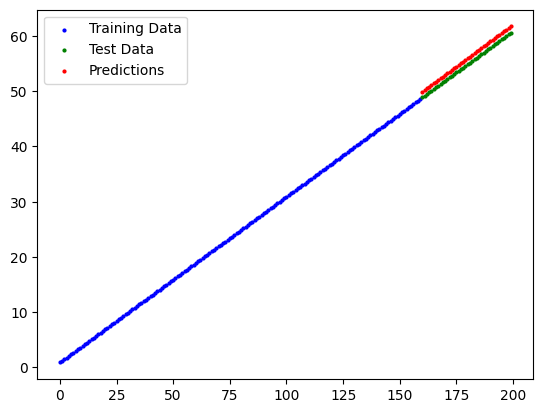

In [47]:
with torch.inference_mode():
        y_test_pred = model_1(X_test)

plot_model(predictions=y_test_pred)

In [49]:
from pathlib import Path

MODEL_PATH = Path("models")
Path.mkdir(MODEL_PATH, parents=True,exist_ok=True)

In [50]:
MODEL_NAME = "model_exercise_1.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH

WindowsPath('models/model_exercise_1.pth')

In [51]:
torch.save(model_1.state_dict(),MODEL_SAVE_PATH)

In [52]:
model_1.state_dict()

OrderedDict([('weight', tensor([0.3020])), ('bias', tensor([1.6351]))])

In [53]:
model_2 = LinearRegressionModel()
model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))

C:\Users\dasdi\AppData\Local\Temp\ipykernel_31608\4175292719.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

In [54]:
model_2.state_dict()

OrderedDict([('weight', tensor([0.3020])), ('bias', tensor([1.6351]))])